# Interpolation Filters

In [1]:

# Halfband filter design for interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# coefficients get discretized to nr bits in +- 0.5
bits=18



fir_0 Passband ripple:	0.0001363848103558379 dB
fir_0 Stopband attenuation:	95.88024782526105 dB
fir_1 Passband ripple:	0.00014910445731079655 dB
fir_1 Stopband attenuation:	95.24393859729784 dB
fir_2 Passband ripple:	0.00018290909101797173 dB
fir_2 Stopband attenuation:	94.21756301828336 dB
fir_3 Passband ripple:	0.0002786985245119621 dB
fir_3 Stopband attenuation:	89.8734534001618 dB


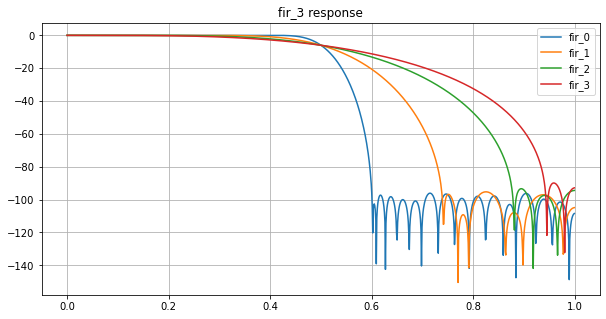

In [15]:
# fir_0
n_0=59
bands_0 = np.array([0., .2, .3, .5])
h_0 = signal.remez(n_0, bands_0, [1,0], [1,1])
h_0[abs(h_0) <= 1e-5] = 0   # force hard zeros
h_0 = np.round(h_0 * 2 ** (bits + 1))     # discretize
h_0 = h_0 * 2 ** -(bits + 1)
(w,H_0) = signal.freqz(h_0, 1, 1000, fs=2)
plt.figure(0,(10,5))
plt.plot(w, 20 * np.log10(abs(H_0)), label='fir_0')
print(f'fir_0 Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_0[:400]))))} dB')
print(f'fir_0 Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_0[600:]))))} dB')

# fir_1
n_1=23
bands_1 = np.array([0., .13, .37, .5])
h_1 = signal.remez(n_1, bands_1, [1,0], [1,1])
h_1[abs(h_1) <= 1e-5] = 0
h_1 = np.round(h_1 * 2 ** (bits + 1))     # discretize
h_1 = h_1 * 2 ** -(bits + 1)
(w,H_1) = signal.freqz(h_1, 1, 1000, fs=2)
plt.plot(w, 20 * np.log10(abs(H_1)), label='fir_1')
print(f'fir_1 Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_1[:200]))))} dB')
print(f'fir_1 Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_1[800:]))))} dB')

# fir_2
n_2=11
bands_2 = np.array([0., .061, .43885, .5])
h_2 = signal.remez(n_2, bands_2, [1,0], [1,1])
h_2[abs(h_2) <= 1e-5] = 0
h_2 = np.round(h_2 * 2 ** (bits + 1))     # discretize
h_2 = h_2 * 2 ** -(bits + 1)
(w,H_2) = signal.freqz(h_2, 1, 1000, fs=2)
plt.plot(w, 20 * np.log10(abs(H_2)), label='fir_2')
print(f'fir_2 Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_2[:100]))))} dB')
print(f'fir_2 Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_2[900:]))))} dB')

# fir_3
n_3=7
bands_3 = np.array([0., .03, .4706, .5])
h_3 = signal.remez(n_3, bands_3, [1,0], [1,1])
h_3[abs(h_3) <= 1e-5] = 0
h_3 = np.round(h_3 * 2 ** (bits + 1))     # discretize
h_3 = h_3 * 2 ** -(bits + 1)
(w,H_3) = signal.freqz(h_3, 1, 1000, fs=2)
plt.plot(w, 20 * np.log10(abs(H_3)), label='fir_3')
plt.title('fir responses')
print(f'fir_3 Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_3[:50]))))} dB')
print(f'fir_3 Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_3[950:]))))} dB')

plt.grid()
plt.legend()

Passband ripple:	161.08765737736476 dB
Stopband attenuation:	89.87348345739767 dB


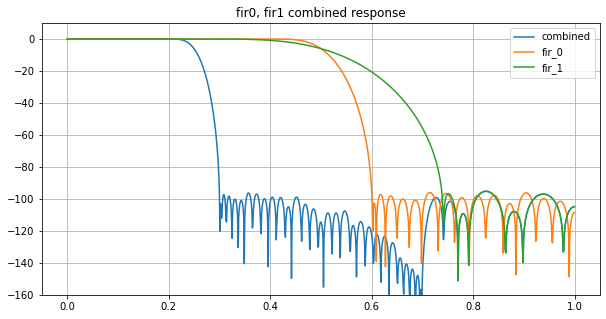

In [17]:
# 0, 1 combined
H_01 = H_1 * np.append(H_0[::2] ,H_0[::-2])
H_012 = H_2 * np.append(H_01[::2] ,H_01[::-2])
plt.figure(0,(10,5))
plt.title('fir0, fir1 combined response')
plt.plot(w, 20 * np.log10(abs(H_01)), label='combined')
plt.plot(w, 20 * np.log10(abs(H_0)), label='fir_0')
plt.plot(w, 20 * np.log10(abs(H_1)), label='fir_1')
plt.ylim(-160,10)
plt.legend()
plt.grid()
print(f'Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_0123[:200]))))} dB')
print(f'Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_0123[300:]))))} dB')

Passband ripple:	0.00042623305317372826 dB
Stopband attenuation:	89.87348345739767 dB


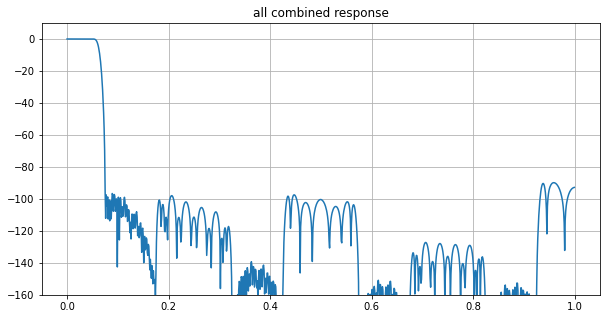

In [16]:
# all combined
H_01 = H_1 * np.append(H_0[::2] ,H_0[::-2])
H_012 = H_2 * np.append(H_01[::2] ,H_01[::-2])
H_0123 = H_3 * np.append(H_012[::2] ,H_012[::-2])
plt.figure(0,(10,5))
plt.title('all combined response')
plt.plot(w, 20 * np.log10(abs(H_0123)))
plt.ylim(-160,10)
plt.grid()
print(f'Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_0123[:50]))))} dB')
print(f'Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_0123[100:]))))} dB')
